# Pre-fit histos

**Motivation:** Get the prefit histograms for 
1. 4b
2. 3b+1 loose

for _all_ of the years.

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import json

from argparse import ArgumentParser

# Stuff from Sean's stats fw
import os
os.sys.path += ['../non-resonant-studies/', '../stats-results/']
from pull_imp_utils import *
from postFit_4cats import get_bin_edgs

from matplotlib.ticker import AutoLocator, AutoMinorLocator, MultipleLocator,FixedLocator, LogLocator
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

import matplotlib.font_manager as font_manager

font_dirs = ['./plotting/fonts/freesans/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Step 0:** Define the steering variables

In [107]:
fDir = '../stats-results/ggF_PUSH'

In [108]:
figDir = 'figures/ggF_PUSH/sep_vs_ohe'

**Step 1:** Load in the workspaces

In [109]:
with open(f'{fDir}/ws-4b-systs-HTcut-300.0-16-17-18-SM-HH-SEP.json') as f:
    sep_4b = json.load(f)

with open(f'{fDir}/ws-3b1f-systs-HTcut-300.0-16-17-18-SM-HH-SEP.json') as f:
    sep_3b1f = json.load(f)

# Training the years inclusively
with open(f'{fDir}/ws-4b-systs-HTcut-300.0-16-17-18-SM-HH-OHE.json') as f:
    ohe_4b = json.load(f)

with open(f'{fDir}/ws-3b1f-systs-HTcut-300.0-16-17-18-SM-HH-OHE.json') as f:
    ohe_3b1f = json.load(f)

**Step 2:** Compare the shape systematic histograms.

In [110]:
e = np.linspace(225,1200,40)
xx = 0.5 * (e[1:] + e[:-1])

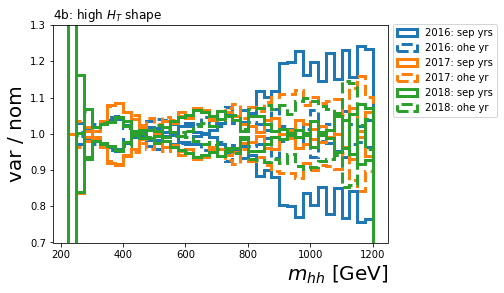

In [111]:
for i,yr in zip(range(3),[16,17,18]):

    for ws, label, ls in zip([sep_4b,ohe_4b],['sep yrs','ohe yr'],['-','--']):
    
        bkg = ws['channels'][i]['samples'][1]
        assert bkg['name']  == f'background{yr}4b'

        nom = np.array(bkg['data'])

        [h0,h1] = [np.array(bkg['modifiers'][2]['data'][v]) for v in ['lo_data','hi_data']]

        plt.hist(xx,e,lw=3,histtype='step',weights=h0/nom,ls=ls,
                color=f'C{i}',label=f'20{yr}: {label}')
        plt.hist(xx,e,lw=3,histtype='step',color=f'C{i}',ls=ls, weights=h1/nom)
        
        plt.legend(bbox_to_anchor=(1,1.03))
        
        plt.xlabel('$m_{hh}$ [GeV]',fontsize=20,x=1,ha='right')
        plt.ylabel('var / nom',fontsize=20) #,y=1,ha='right',)
        plt.title('4b: high $H_T$ shape',loc='left')

        plt.ylim(0.7,1.3)
        

**Conclusions:** The OHE is encouraging some of the shape variation templates to be more like each other than they would be otherwise.

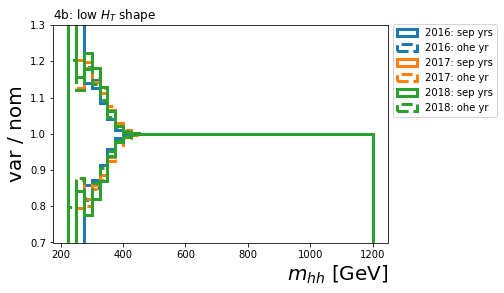

In [112]:
for i,yr in zip(range(3),[16,17,18]):

    for ws, label, ls in zip([sep_4b,ohe_4b],['sep yrs','ohe yr'],['-','--']):
    
        bkg = ws['channels'][i]['samples'][1]
        assert bkg['name']  == f'background{yr}4b'

        nom = np.array(bkg['data'])

        [h0,h1] = [np.array(bkg['modifiers'][1]['data'][v]) for v in ['lo_data','hi_data']]

        plt.hist(xx,e,lw=3,histtype='step',weights=h0/nom,ls=ls,
                color=f'C{i}',label=f'20{yr}: {label}')
        plt.hist(xx,e,lw=3,histtype='step',color=f'C{i}',ls=ls, weights=h1/nom)
        
        plt.legend(bbox_to_anchor=(1,1.03))
        
        plt.xlabel('$m_{hh}$ [GeV]',fontsize=20,x=1,ha='right')
        plt.ylabel('var / nom',fontsize=20) #,y=1,ha='right',)
        plt.title('4b: low $H_T$ shape',loc='left')

        plt.ylim(0.7,1.3)
        

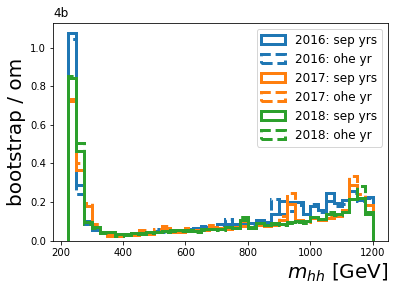

In [113]:
for i,yr in zip(range(3),[16,17,18]):

    for ws, label, ls in zip([sep_4b,ohe_4b],['sep yrs','ohe yr'],['-','--']):
    
        bkg = ws['channels'][i]['samples'][1]
        assert bkg['name']  == f'background{yr}4b'

        nom = np.array(bkg['data'])

        stat = np.array(bkg['modifiers'][0]['data'])
        
        plt.hist(xx,e,lw=3,histtype='step',weights=stat/nom,ls=ls,
                color=f'C{i}',label=f'20{yr}: {label}')
        
        plt.legend(fontsize=12)
        
        plt.xlabel('$m_{hh}$ [GeV]',fontsize=20,x=1,ha='right')
        plt.ylabel('bootstrap / om',fontsize=20) #,y=1,ha='right',)
        plt.title('4b',loc='left')

plt.savefig(f'{figDir}/BS_4b.pdf')           

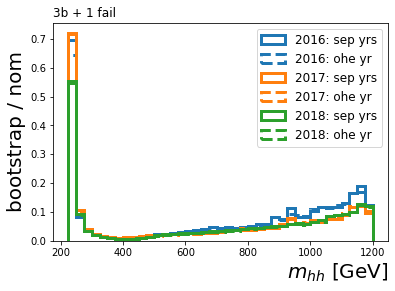

In [114]:
for i,yr in zip(range(3),[16,17,18]):

    for ws, label, ls in zip([sep_3b1f,ohe_3b1f],['sep yrs','ohe yr'],['-','--']):
    
        bkg = ws['channels'][i]['samples'][1]
        assert bkg['name']  == f'background{yr}3b1f'

        nom = np.array(bkg['data'])

        stat = np.array(bkg['modifiers'][0]['data'])
        
        plt.hist(xx,e,lw=3,histtype='step',weights=stat/nom,ls=ls,
                color=f'C{i}',label=f'20{yr}: {label}')
        
        plt.legend(fontsize=12)
        
        plt.xlabel('$m_{hh}$ [GeV]',fontsize=20,x=1,ha='right')
        plt.ylabel('bootstrap / nom',fontsize=20) 
        plt.title('3b + 1 fail',loc='left')

plt.savefig(f'{figDir}/BS_3b1f.pdf')        

**However:** These histograms (as they are) are a big challegig to read, so I'm goig to break these figures dow a bit :)

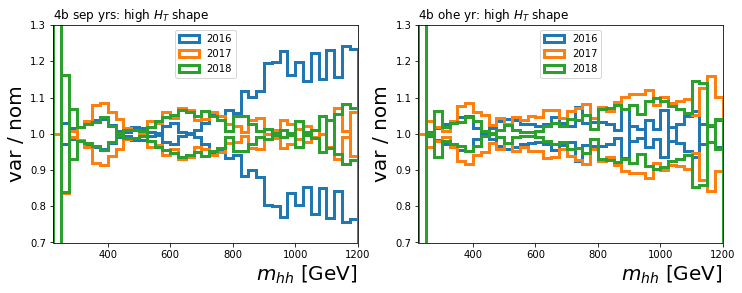

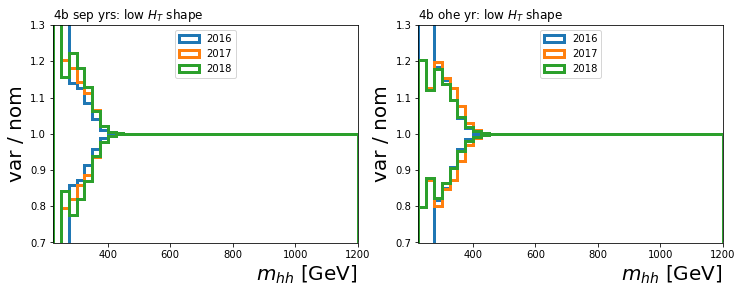

In [115]:
for mod_idx, title, name in zip([2,1],['high $H_T$','low $H_T$'],['high_HT','low_HT']):

    fig, axes = plt.subplots(1,2, figsize=(12,4))

    for i,yr in zip(range(3),[16,17,18]):

        for ax, ws, label, ls in zip(axes,[sep_4b,ohe_4b],['sep yrs','ohe yr'],['-','--']):

            bkg = ws['channels'][i]['samples'][1]
            assert bkg['name']  == f'background{yr}4b'

            nom = np.array(bkg['data'])

            [h0,h1] = [np.array(bkg['modifiers'][mod_idx]['data'][v]) for v in ['lo_data','hi_data']]

            ax.hist(xx,e,lw=3,histtype='step',weights=h0/nom,#ls=ls,
                    color=f'C{i}',label=f'20{yr}')
            ax.hist(xx,e,lw=3,histtype='step',color=f'C{i}',weights=h1/nom)

            ax.legend(loc='upper center')

            ax.set_xlabel('$m_{hh}$ [GeV]',fontsize=20,x=1,ha='right')
            ax.set_ylabel('var / nom',fontsize=20) 
            ax.set_title(f'4b {label}: {title} shape',loc='left')

            ax.set_xlim(225,1200)
            ax.set_ylim(.7,1.3)

    plt.savefig(f'{figDir}/{name}_4b_by_train.pdf',bbox_inches='tight')

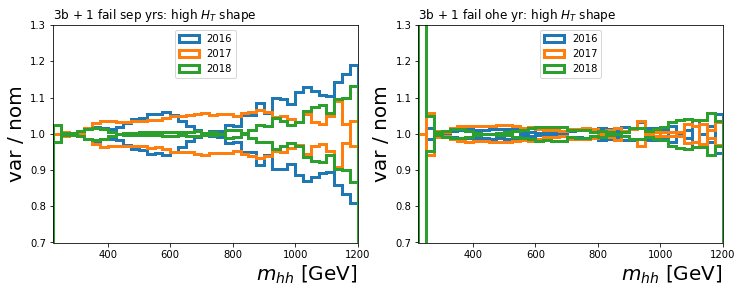

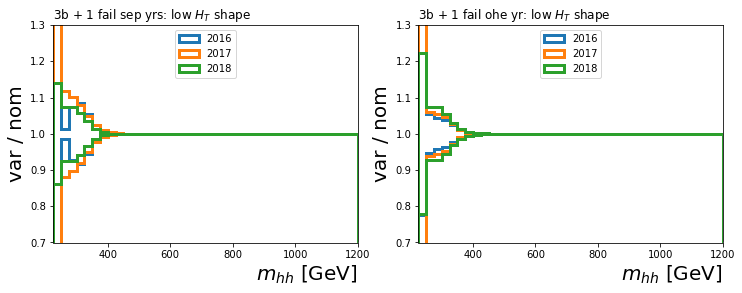

In [116]:
for mod_idx, title, name in zip([2,1],['high $H_T$','low $H_T$'],['high_HT','low_HT']):

    fig, axes = plt.subplots(1,2, figsize=(12,4))

    for i,yr in zip(range(3),[16,17,18]):

        for ax, ws, label, ls in zip(axes,[sep_3b1f,ohe_3b1f],['sep yrs','ohe yr'],['-','--']):

            bkg = ws['channels'][i]['samples'][1]
            assert bkg['name']  == f'background{yr}3b1f'

            nom = np.array(bkg['data'])

            [h0,h1] = [np.array(bkg['modifiers'][mod_idx]['data'][v]) for v in ['lo_data','hi_data']]

            ax.hist(xx,e,lw=3,histtype='step',weights=h0/nom,#ls=ls,
                    color=f'C{i}',label=f'20{yr}')
            ax.hist(xx,e,lw=3,histtype='step',color=f'C{i}',weights=h1/nom)

            ax.legend(loc='upper center')

            ax.set_xlabel('$m_{hh}$ [GeV]',fontsize=20,x=1,ha='right')
            ax.set_ylabel('var / nom',fontsize=20) 
            ax.set_title(f'3b + 1 fail {label}: {title} shape',loc='left')

            ax.set_xlim(225,1200)
            ax.set_ylim(.7,1.3)
            
            
    plt.savefig(f'{figDir}/{name}_3b1f_by_train.pdf',bbox_inches='tight')

Ok - eve from here it seems like the strategy of traiig the years iclusively is *less coservative*.

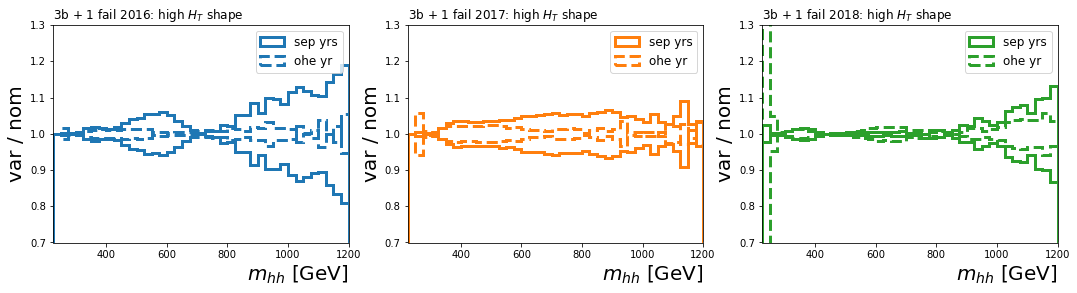

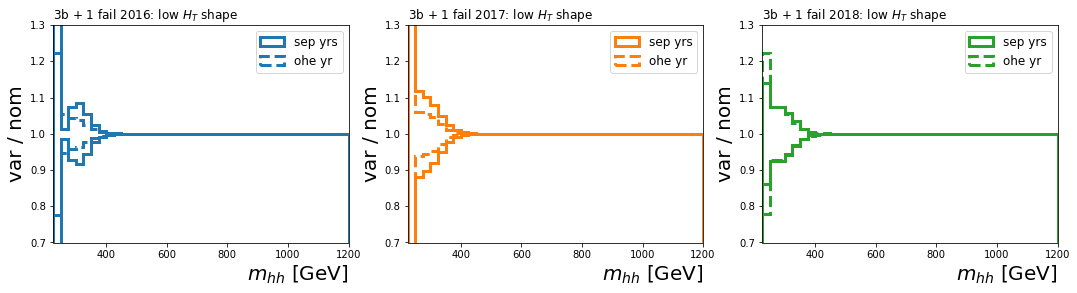

In [117]:
for mod_idx, title, name in zip([2,1],['high $H_T$','low $H_T$'],['high_HT','low_HT']):
    
    fig, axes = plt.subplots(1,3, figsize=(18,4))
    
    for i,ax,yr in zip(range(3),axes,[16,17,18]):
    
        for ws, label, ls in zip([sep_3b1f,ohe_3b1f],['sep yrs','ohe yr'],['-','--']):

            bkg = ws['channels'][i]['samples'][1]
            assert bkg['name']  == f'background{yr}3b1f'

            nom = np.array(bkg['data'])

            [h0,h1] = [np.array(bkg['modifiers'][mod_idx]['data'][v]) for v in ['lo_data','hi_data']]

            ax.hist(xx,e,lw=3,histtype='step',weights=h0/nom,ls=ls,
                    color=f'C{i}',label=f'{label}')
            ax.hist(xx,e,lw=3,histtype='step',color=f'C{i}',weights=h1/nom,ls=ls)

        ax.legend(fontsize=12)

        ax.set_xlabel('$m_{hh}$ [GeV]',fontsize=20,x=1,ha='right')
        ax.set_ylabel('var / nom',fontsize=20) 
        ax.set_title(f'3b + 1 fail 20{yr}: {title} shape',loc='left')

        ax.set_xlim(225,1200)
        ax.set_ylim(.7,1.3)
        
    plt.savefig(f'{figDir}/{name}_3b1f_by_yr.pdf',bbox_inches='tight')

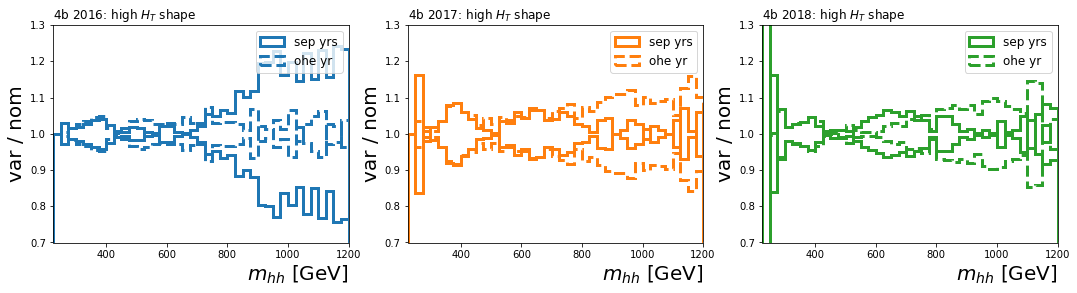

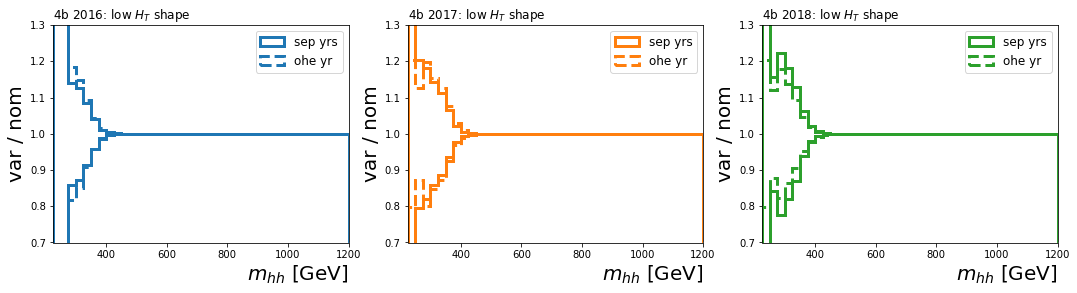

In [118]:
for mod_idx, title, name in zip([2,1],['high $H_T$','low $H_T$'],['high_HT','low_HT']):
    
    fig, axes = plt.subplots(1,3, figsize=(18,4))
    
    for i,ax,yr in zip(range(3),axes,[16,17,18]):
    
        for ws, label, ls in zip([sep_4b,ohe_4b],['sep yrs','ohe yr'],['-','--']):

            bkg = ws['channels'][i]['samples'][1]
            assert bkg['name']  == f'background{yr}4b'

            nom = np.array(bkg['data'])

            [h0,h1] = [np.array(bkg['modifiers'][mod_idx]['data'][v]) for v in ['lo_data','hi_data']]

            ax.hist(xx,e,lw=3,histtype='step',weights=h0/nom,ls=ls,
                    color=f'C{i}',label=f'{label}')
            ax.hist(xx,e,lw=3,histtype='step',color=f'C{i}',weights=h1/nom,ls=ls)

        ax.legend(fontsize=12)

        ax.set_xlabel('$m_{hh}$ [GeV]',fontsize=20,x=1,ha='right')
        ax.set_ylabel('var / nom',fontsize=20) 
        ax.set_title(f'4b 20{yr}: {title} shape',loc='left')

        ax.set_xlim(225,1200)
        ax.set_ylim(.7,1.3)
        
    plt.savefig(f'{figDir}/{name}_4b_by_yr.pdf',bbox_inches='tight')

**Note:** To run over all of the years together - from Liaoshan's talk, it seems like we will need to be reading in separate normalizations from the files.

In [120]:
f16['sig'].keys()

['run_number',
 'event_number',
 'pass_vbf_sel',
 'mc_sf',
 'trig_sf',
 'jet_trig_sfs',
 'truth_mhh',
 'ntag',
 'njets',
 'X_hh',
 'kinematic_region',
 'm_min_dj',
 'm_max_dj',
 'pairing_score_1',
 'pairing_score_2',
 'bkt_lead_jet_pt',
 'bkt_third_lead_jet_pt',
 'bkt_HT',
 'bucket_passed',
 'cos_theta_star',
 'm_hh_cor',
 'm_hh',
 'pt_hh',
 'dEta_hh',
 'X_wt_tag',
 'X_wt_notag',
 'X_wt_nonHCWjets',
 'passMuonIso',
 'trig_bucket',
 'm_h1',
 'E_h1',
 'pT_h1',
 'eta_h1',
 'phi_h1',
 'm_h2',
 'E_h2',
 'pT_h2',
 'eta_h2',
 'phi_h2',
 'm_h1_j1',
 'E_h1_j1',
 'pT_h1_j1',
 'eta_h1_j1',
 'phi_h1_j1',
 'tag_h1_j1',
 'quantile_h1_j1',
 'angle_h1_j1',
 'm_h1_j2',
 'E_h1_j2',
 'pT_h1_j2',
 'eta_h1_j2',
 'phi_h1_j2',
 'tag_h1_j2',
 'quantile_h1_j2',
 'angle_h1_j2',
 'm_h2_j1',
 'E_h2_j1',
 'pT_h2_j1',
 'eta_h2_j1',
 'phi_h2_j1',
 'tag_h2_j1',
 'quantile_h2_j1',
 'angle_h2_j1',
 'm_h2_j2',
 'E_h2_j2',
 'pT_h2_j2',
 'eta_h2_j2',
 'phi_h2_j2',
 'tag_h2_j2',
 'quantile_h2_j2',
 'angle_h2_j2',
 'minQ',


In [91]:
norm_dict = {}

In [92]:
fname = '../data/RR/cryptotuples/seanFixOHEyr_bkt/data_baseline_bl_{}_NN_100_bootstraps.root'

In [96]:
f16 = uproot.open(fname.format(16))
f17 = uproot.open(fname.format(17))
f18 = uproot.open(fname.format(18))

In [95]:
f.keys()

['sig;1',
 'control;1',
 'validation;1',
 'NN_norm_bstrap_med_16;1',
 'NN_norm_bstrap_IQR_16;1',
 'NN_norm_VRderiv_bstrap_med_16;1',
 'NN_norm_VRderiv_bstrap_IQR_16;1',
 'X_wt_cut_for_rw;1',
 'NN_norm_3b1l_bstrap_med_16;1',
 'NN_norm_3b1l_bstrap_IQR_16;1',
 'NN_norm_VRderiv_3b1l_bstrap_med_16;1',
 'NN_norm_VRderiv_3b1l_bstrap_IQR_16;1',
 'X_wt_cut_for_rw_3b1l;1',
 'NN_norm_3b1f_bstrap_IQR_16;1',
 'NN_norm_VRderiv_3b1f_bstrap_IQR_16;1',
 'X_wt_cut_for_rw_3b1f;1',
 'NN_norm_bstrap_med_all;1',
 'NN_norm_VRderiv_bstrap_med_all;1',
 'NN_norm_3b1l_bstrap_med_all;1',
 'NN_norm_VRderiv_3b1l_bstrap_med_all;1',
 'NN_norm_3b1f_bstrap_med_all;1',
 'NN_norm_VRderiv_3b1f_bstrap_med_all;1',
 'NN_norm_3b1f_bstrap_med_16;1',
 'NN_norm_VRderiv_3b1f_bstrap_med_16;1']

In [122]:
f16[f'NN_norm_3b1f_bstrap_med_16'].all_members['fVal']

1.0076869928079302

In [121]:
f16[f'NN_norm_3b1f_bstrap_med_all'].all_members['fVal']

1.008711257356404

In [105]:
f18[f'NN_norm_VRderiv_3b1f_bstrap_med_all'].all_members['fVal']

1.0098412004983885

In [99]:
f17[f'NN_norm_3b1f_bstrap_med_all'].all_members['fVal']

1.008711257356404

In [100]:
f18[f'NN_norm_3b1f_bstrap_med_all'].all_members['fVal']

1.008711257356404

In [101]:
f16[f'NN_norm_3b1f_bstrap_med_16'].all_members['fVal']

1.0076869928079302